## Regression Models

There are many types of regression analysis techniques, and teh use of each method depends upon the number of factors. These factors include the type of __target variable__, shape of the __regression line__, and the number of __independent variables__.


## Linear Regression

1. Residual Sum Square 
2. Gradient Decent


Article : https://www.researchgate.net/publication/34068679

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Salary_Data.csv')
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

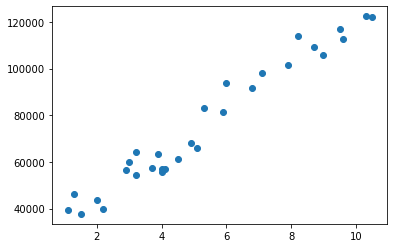

In [3]:
plt.scatter(X,Y)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x,x_test,y,y_test=train_test_split(X,Y,test_size=1/3)

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [7]:
regressor.intercept_, regressor.coef_

(21767.630397347617, array([10050.55142901]))

In [8]:
y_pred_sk= regressor.predict(x_test)

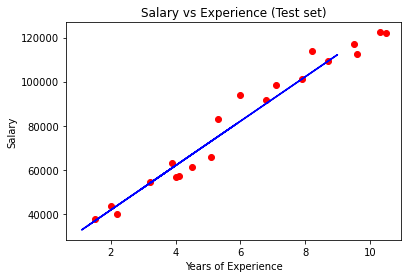

In [9]:
plt.scatter(x, y, color = 'red')
plt.plot(x_test, regressor.predict(x_test), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Residual Sum Square method

In [10]:

def linear_regression(x,y,x_test):
    ones = np.ones(shape=(x.shape[0],1))
    x_train = np.concatenate((ones,x),axis=1)
    y_train = np.reshape(y,(y.shape[0],1))
    
    
#     w = ((X^T.X)^-1)X^T.Y
    inverse = np.linalg.inv(np.dot(np.transpose(x_train),x_train))
    weight = np.dot(np.dot(inverse,np.transpose(x_train)),y_train)
    print("Weights : ",end=" ")
    for w in weight:
        print(w,end=",")
    print()
    #Prepare y_test
    
    one_test = np.ones(shape=(x_test.shape[0],1))
    x_test = np.concatenate((one_test,x_test),axis=1)
    print(x_test.shape,weight.shape)
    y_pred = np.dot(x_test,weight)
    
    y_pred=np.squeeze(y_pred)
    return y_pred
    

In [11]:
y_pred = linear_regression(x,y,x_test)

Weights :  [21767.63039735],[10050.55142901],
(10, 2) (2, 1)


In [12]:
print(y_test)

[ 46205. 105582.  67938.  60150.  39343.  81363.  64445.  55794.  56642.
  57189.]


In [13]:
#Printing

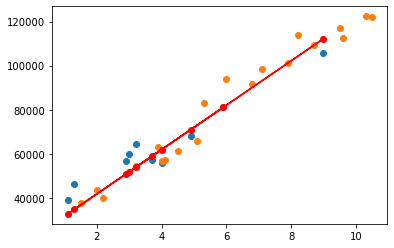

In [14]:
plt.scatter(x_test,y_test)
plt.scatter(x,y)

plt.plot(x_test,y_pred,color='red')
plt.scatter(x_test,y_pred,color='red')


In [15]:
#RSS ERror

In [16]:
e = y_test - y_pred
rss = np.dot(np.transpose(e),e)
rss

477866050.51061714